In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm

c:\Users\Dell\Desktop\Code\FTD\Quantitative Methods II\folder\venv\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [12]:
# number of generated points
Ni = 1000
# generate points from a standard normal law
# use a Random Generator so we always have the same samples generated
y = np.random.default_rng(2022).normal(0, 1, Ni)

(array([  5.,  19.,  77., 158., 241., 257., 144.,  70.,  22.,   7.]),
 array([-3.1294946 , -2.50993689, -1.89037918, -1.27082147, -0.65126376,
        -0.03170604,  0.58785167,  1.20740938,  1.82696709,  2.4465248 ,
         3.06608251]),
 <BarContainer object of 10 artists>)

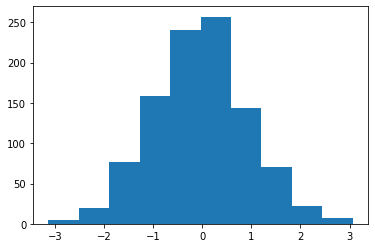

In [13]:
plt.hist(y)

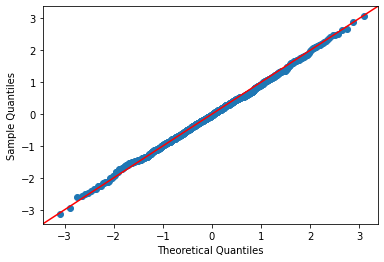

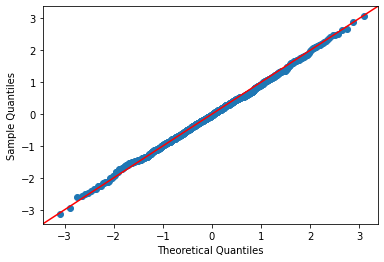

In [14]:
sm.qqplot(y, line='45')

In [15]:
y.sort()

In [16]:
y

array([-3.12949460e+00, -2.93124850e+00, -2.60658560e+00, -2.55266325e+00,
       -2.51172986e+00, -2.47541091e+00, -2.42356911e+00, -2.35362635e+00,
       -2.33357377e+00, -2.26760016e+00, -2.25209446e+00, -2.24770788e+00,
       -2.17177401e+00, -2.15542579e+00, -2.13346338e+00, -2.11490706e+00,
       -2.11375268e+00, -2.11075229e+00, -2.01749135e+00, -2.01742461e+00,
       -2.00336249e+00, -1.95408305e+00, -1.93454622e+00, -1.89455986e+00,
       -1.83060096e+00, -1.82545292e+00, -1.81499634e+00, -1.80440012e+00,
       -1.75450835e+00, -1.73198018e+00, -1.71851264e+00, -1.71259380e+00,
       -1.71158270e+00, -1.70406778e+00, -1.67827637e+00, -1.67352390e+00,
       -1.65688724e+00, -1.63342117e+00, -1.63187679e+00, -1.61728344e+00,
       -1.61184351e+00, -1.60435861e+00, -1.58078265e+00, -1.56752422e+00,
       -1.56509725e+00, -1.54706205e+00, -1.54582544e+00, -1.53350660e+00,
       -1.53150574e+00, -1.52765993e+00, -1.52045921e+00, -1.50725671e+00,
       -1.49833667e+00, -

In [17]:
from scipy.stats import kstest

In [18]:
kstest(y, 'norm')

KstestResult(statistic=0.03628556439763386, pvalue=0.14017523348118444)

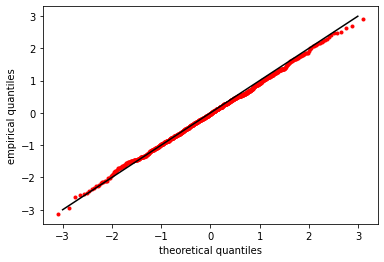

In [19]:
x = []
for i in range(0,Ni):
    x.append(norm.ppf((i+1)/Ni))
    # to avoid loosing the last point, we can use Ni+1 at the denominator
    #x.append(norm.ppf((i+1)/(Ni+1)))
    
# 4) plot empirical against theoretical quantiles
plt.plot(x, y, 'r.') # x vs y
plt.plot(np.arange(-3,3,6/Ni),np.arange(-3,3,6/Ni),'k-') # identity line
plt.xlabel('theoretical quantiles')
plt.ylabel('empirical quantiles')
plt.show()    

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pareto, genpareto, lognorm, weibull_min, expon
from scipy.stats import probplot # for Probability plots
import statsmodels.api as sm # for Q-Q plots

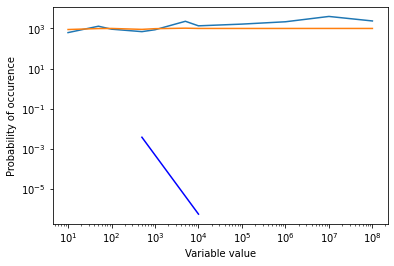

We keep only 5.0 percent of observations
Hill estimator 1.0831158864621733


c:\Users\Dell\Desktop\Code\FTD\Quantitative Methods II\folder\venv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2640: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


Scipy Pareto type I estimator 1.0831450443831598
Scipy Pareto type I estimator upper threshold 1.4379883538658378
Scipy Pareto type II estimator 1.5339593563734342
Scipy Pareto type I estimator upper threshold 1.3995068360837764


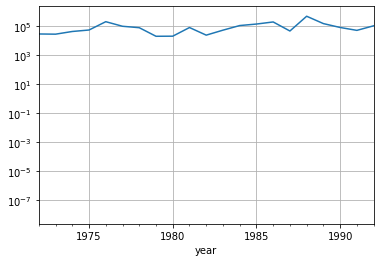

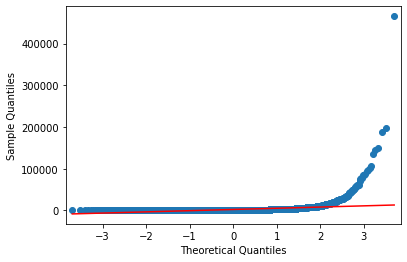

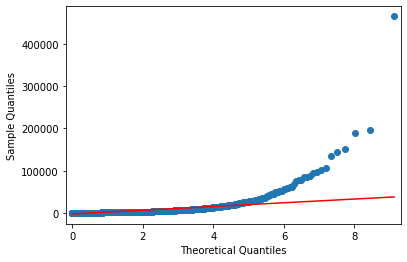

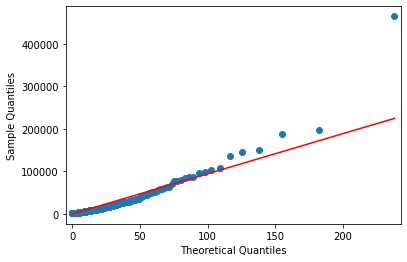

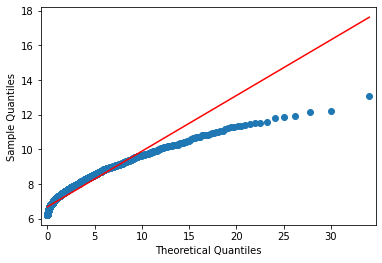

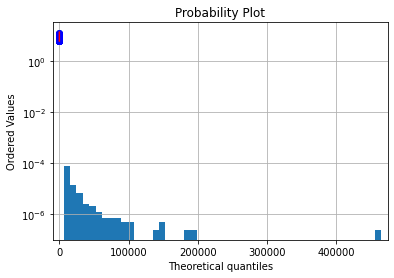

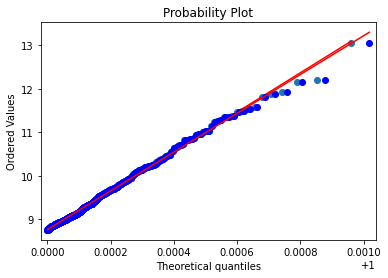

In [2]:
# To plot, set ploton to True
ploton = True

# We set the working directory (useful to chose the folder where to export output files)
#%% Pareto distribution of claim sizes

# we chose 1 < alpha < 2
alphai = 1.95
xm = ((alphai-1)/alphai) * 1000

# illustration of the variance as n tends to infinity
Nplist = [10,5*10,10**2,5*10**2,10**3,5*10**3,10**4,10**5,10**6,10**7,10**8]
Varlist = []
Meanlist = []
for Npi in Nplist:
    pop = pareto.rvs(b=alphai, scale=xm, size=Npi)
    Varlist.append(np.std(pop))
    Meanlist.append(np.mean(pop))
    
if ploton:
    plt.loglog(Nplist,Varlist) # observe that Var(X) -> infinity
    plt.loglog(Nplist,Meanlist) # observe that indeed E(X) -> 1000

# probability density function
def pdfpareto(x,alphai,xm):
    return alphai * (xm**alphai)/(x**(alphai+1))

# plot the probability density
dx = 0.001  # resolution
x = np.arange(500, 10000, dx)
pdf = pareto.pdf(x, b=alphai, scale=xm)

if ploton:
    plt.plot(x, pdf, 'b', label="Pareto PDF")
    plt.xlabel("Variable value")
    plt.ylabel("Probability of occurence")
    plt.show()
    plt.close()

del alphai, dx, Meanlist, Npi, Nplist, pdf, pop, Varlist, x, xm

#%% Norwegian fire data

# Import the data set, we found it via ReIns package in R
df = pd.read_csv('norwegianfire.csv', index_col=0)

# convert years to year
df.year = pd.to_datetime(df.year, format="%y")

# we cannot really plot the time series as each observation is only per year
# instead for visual, we plot the max per year
if ploton:
    df.groupby('year')['size'].max().plot(x='year')

# what is our theshold u, it should be 500 Kronen
u = min(df['size'])

if ploton:
    df['size'].hist(bins=50, density=True, log=True)

#%% Q-Q plot
# normal law
if ploton:
    sm.qqplot(df['size'], line='r')

# exponential law
if ploton:
    sm.qqplot(df['size'], line='r', dist=expon)


# log-normal law
# you have to indicate the shape parameter in the distargs arguments
if ploton:
    shapelgn = lognorm.fit(df['size'])[0]
    sm.qqplot(df['size'], line='r', dist=lognorm, distargs=(shapelgn, ))

    
# Weibull law
# nota bene: in the sparams, you need to choose the shape parameter
if ploton:
    c = weibull_min.fit(df['size'])[0]
    sm.qqplot(np.log(df['size']), dist=weibull_min, distargs=(c, ), line='r')


# Pareto law
# nota bene: in the sparams, you need to define the scale parameter, here it is u=500 Kronen
if ploton:
    sm.qqplot(np.log(df['size']), dist=pareto, distargs=(u, ), line='r')
    # cf. Prboplot documentation
    probplot(np.log(df['size']), dist="pareto", plot=plt, sparams=(u, ))

# change u
percentilei = 95
uprime = np.percentile(df['size'], percentilei)

print("We keep only", np.round(100 * len(df.loc[df['size']>=uprime,'size'])/len(df)), "percent of observations")

# plot the updated histogram
if ploton:
    df.loc[df['size']>=uprime,'size'].hist(bins=50, density=True, log=True)

# Q-Q plot for a Pareto
if ploton:
    sm.qqplot(np.log(df.loc[df['size']>=uprime,'size']), dist=pareto, distargs=(uprime, ), line='r')
    # cf. Prboplot documentation
    probplot(np.log(df.loc[df['size']>=uprime,'size']), dist="pareto", plot=plt, sparams=(uprime, ))

#%% Pareto type 1
# estimate a Pareto distribution
print('Hill estimator', 1 / ( (1/len(df)) * np.sum(np.log(df['size'] / df['size'].min()))) )
# obviously, we get the same estimate with scipy's package

print('Scipy Pareto type I estimator', pareto.fit(df['size'], scale=u)[0])

# now if we change the threshold, the estimate of alhpa also changes
pareto.fit(df.loc[df['size']>=uprime,'size'])
print('Scipy Pareto type I estimator upper threshold', pareto.fit(df.loc[df['size']>=uprime,'size'])[0])

#%% Parto type 2

# in the definition of the way it is implemented in scipy we have:
# alpha = 1 / c
# u = loc
# sigma = scale
print('Scipy Pareto type II estimator', 1 / genpareto.fit(df['size'], loc=u)[0])

# now if we change the threshold, the estimate of alhpa also changes
print('Scipy Pareto type I estimator upper threshold', 1 / genpareto.fit(df.loc[df['size']>=uprime,'size'], loc=uprime)[0])

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [4]:
a = np.abs(np.random.default_rng(2022).normal(1, 1, 100000))

b = stats.pareto(1/1.5).rvs(100000)